In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import torch
from torch import nn

from hparams.light15_hparams import create_hparams
from model import Model
from datasets import LJDataset, TextMelCollate
from utils import sizeof_fmt, Logger

In [2]:
!nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"]="1"

Sun Mar  7 19:11:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.04    Driver Version: 455.23.04    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3090    Off  | 00000000:19:00.0 Off |                  N/A |
| 62%   45C    P8    33W / 370W |  11780MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 3090    Off  | 00000000:68:00.0 Off |                  N/A |
| 38%   

In [3]:
save_dir = 'save/light15_model'
logger = Logger(save_dir=save_dir, new=False)
print('done')

done


In [4]:
stt_hparams, tts_hparams = create_hparams()
model = Model(stt_hparams, tts_hparams)
model = model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=tts_hparams.lr, weight_decay=tts_hparams.weight_decay)

step = 9178

size = sizeof_fmt(4 * sum(p.numel() for p in model.parameters()))
print(f"Model size {size}")

size = sizeof_fmt(4 * sum(p.numel() for p in model.tts.parameters()))
print(f"TTS size {size}")

size = sizeof_fmt(4 * sum(p.numel() for p in model.tts.mel_encoder.parameters()))
print(f"MelEncoder size {size}")

size = sizeof_fmt(4 * sum(p.numel() for p in model.tts.mel_decoder.parameters()))
print(f"MelDecoder size {size}")

if True:
    model, optimizer, step = logger.load(step, model, optimizer)
print(step)

print('done')

Model size 32.7MiB
TTS size 26.3MiB
MelEncoder size 8.2MiB
MelDecoder size 16.1MiB
loaded : 9178
9178
done


In [5]:
trainset = LJDataset(tts_hparams.root_dir)
collate_fn = TextMelCollate()
train_loader = torch.utils.data.DataLoader(trainset, num_workers=tts_hparams.num_workers, 
                          shuffle=True,
                          sampler=None,
                          batch_size=tts_hparams.batch_size, pin_memory=False,
                          drop_last=True, collate_fn=collate_fn)

print(train_loader)

In [6]:
def to_cuda(batch):
    batch['text'] = batch['text'].cuda()
    batch['text_lengths'] = batch['text_lengths'].cuda()
    batch['mels'] = batch['mels'].cuda()
    batch['mel_lengths'] = batch['mel_lengths'].cuda()
    
    return batch

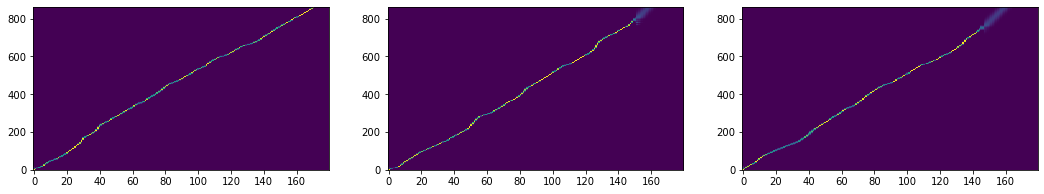

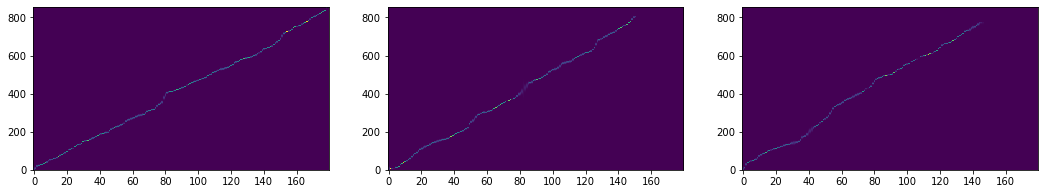

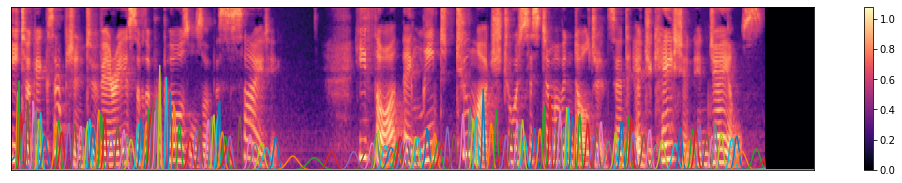

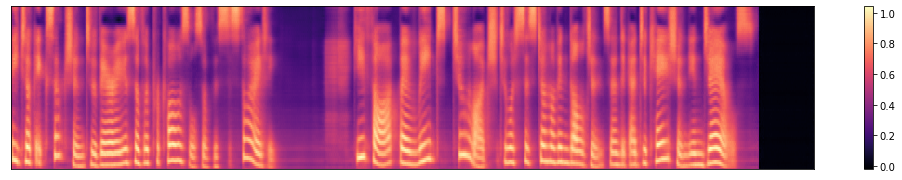

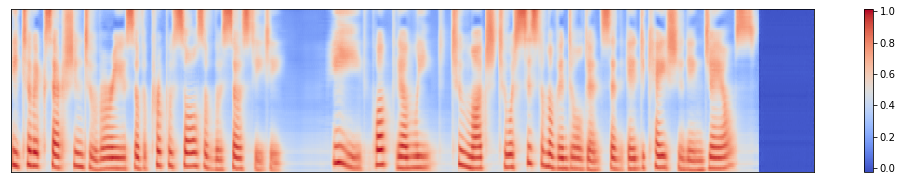

tensor(6.8035, device='cuda:0')
step : 10401 stt : 0.5541 tts : 0.3018 recon : 0.0029 kl : 0.0047 beta : 0.2081
tensor(4.6661, device='cuda:0')
step : 10402 stt : 0.4930 tts : 0.3648 recon : 0.0029 kl : 0.0045 beta : 0.2081
tensor(1.5692, device='cuda:0')
step : 10403 stt : 0.4775 tts : 0.3779 recon : 0.0030 kl : 0.0047 beta : 0.2081
tensor(2.2703, device='cuda:0')
step : 10404 stt : 0.5233 tts : 0.3457 recon : 0.0031 kl : 0.0048 beta : 0.2081
tensor(0.9099, device='cuda:0')
step : 10405 stt : 0.5112 tts : 0.2796 recon : 0.0030 kl : 0.0048 beta : 0.2081
tensor(1.8781, device='cuda:0')
step : 10406 stt : 0.5941 tts : 0.3396 recon : 0.0027 kl : 0.0046 beta : 0.2082
tensor(1.5272, device='cuda:0')
step : 10407 stt : 0.5995 tts : 0.2332 recon : 0.0030 kl : 0.0048 beta : 0.2082
tensor(1.3561, device='cuda:0')
step : 10408 stt : 0.5232 tts : 0.2464 recon : 0.0030 kl : 0.0048 beta : 0.2082
tensor(1.6873, device='cuda:0')
step : 10409 stt : 0.4488 tts : 0.3457 recon : 0.0029 kl : 0.0047 beta :

tensor(1.7228, device='cuda:0')
step : 10475 stt : 0.5572 tts : 0.2998 recon : 0.0029 kl : 0.0046 beta : 0.2095
tensor(3.7137, device='cuda:0')
step : 10476 stt : 0.5617 tts : 0.3883 recon : 0.0027 kl : 0.0045 beta : 0.2096
tensor(2.4523, device='cuda:0')
step : 10477 stt : 0.5258 tts : 0.2862 recon : 0.0032 kl : 0.0049 beta : 0.2096
tensor(1.1580, device='cuda:0')
step : 10478 stt : 0.4989 tts : 0.3569 recon : 0.0026 kl : 0.0046 beta : 0.2096
tensor(1.4734, device='cuda:0')
step : 10479 stt : 0.5294 tts : 0.3118 recon : 0.0027 kl : 0.0046 beta : 0.2096
tensor(3.5550, device='cuda:0')
step : 10480 stt : 0.5189 tts : 0.3560 recon : 0.0029 kl : 0.0048 beta : 0.2096
tensor(0.8461, device='cuda:0')
step : 10481 stt : 0.5287 tts : 0.3027 recon : 0.0030 kl : 0.0047 beta : 0.2097
tensor(1.1975, device='cuda:0')
step : 10482 stt : 0.5326 tts : 0.2774 recon : 0.0025 kl : 0.0044 beta : 0.2097
tensor(2.0163, device='cuda:0')
step : 10483 stt : 0.5414 tts : 0.3250 recon : 0.0030 kl : 0.0048 beta :

In [ ]:
from IPython import display
import matplotlib.pyplot as plt
import librosa.display


model.train()

while(True):
    
    for batch in train_loader:
        batch = to_cuda(batch)
        
        model.train()
        model.increase_step()
        model.zero_grad()

        stt_outputs, tts_outputs = model(batch)
        loss = tts_outputs['loss'] + stt_outputs['loss']
        loss.backward()
        
        grad_norm = nn.utils.clip_grad_norm_(model.parameters(), 1)
        print(grad_norm.mean())
        if torch.isnan(grad_norm.mean()):
            continue
        
        optimizer.step()
        
        if step % 5000 == 0:
            logger.save(step, model, optimizer)
        
        if step % 1 == 0:
            print('step :', step, 
                  'stt :', '%0.4f' % stt_outputs['loss'].item(),
                  'tts :', '%0.4f' % tts_outputs['loss'].item(),
                  'recon :', '%0.4f' % tts_outputs['recon_loss'].item(),
                  'kl :', '%0.4f' % tts_outputs['kl_loss'].item(),
                  'beta :', '%0.4f' % model.beta.item())
                  
            
        if step % 100 == 0:
            logger.log(step, 'stt_loss', stt_outputs['loss'].item())
            logger.log(step, 'tts_loss', tts_outputs['loss'].item())    
            logger.log(step, 'recon_loss', tts_outputs['recon_loss'].item())    
            logger.log(step, 'kl_loss', tts_outputs['kl_loss'].item())    
            logger.log(step, 'beta', model.beta.item())    
            
        if step % 100 == 0:
            display.clear_output()
            
            index = 3
            model.eval()
            with torch.no_grad():
                samples = model.inference(batch['text'], batch['mels'].size(2), stt_outputs["alignments"], temperature=0.7)

            _tts_alignments = tts_outputs["alignments"].data.cpu().numpy()
            batch_size = _tts_alignments.shape[0]
            plt.figure(figsize=[18, 3])
            for i in range(3):
                plt.subplot(1, 3, i+1)
                plt.imshow(_tts_alignments[i].T, aspect='auto', origin='lower', interpolation='none')
            plt.show()
            
            _stt_alignments = stt_outputs["alignments"].data.cpu().numpy()
            batch_size = _stt_alignments.shape[0]
            plt.figure(figsize=[18, 3])
            for i in range(3):
                plt.subplot(1, 3, i+1)
                plt.imshow(_stt_alignments[i].T, aspect='auto', origin='lower', interpolation='none')
            plt.show()
            
            plt.figure(figsize=[18, 3])
            _x = batch['mels'].data.cpu().numpy()
            librosa.display.specshow(_x[index])
            plt.colorbar()
            
            for i in range(_stt_alignments.shape[1]):
                plt.plot(_stt_alignments[index, i] * 100)
                
            plt.show()
            
            plt.figure(figsize=[18, 3])
            _y = tts_outputs['pred'].data.cpu().numpy()
            librosa.display.specshow(_y[index])
            plt.colorbar()
            plt.show()
            
            plt.figure(figsize=[18, 3])
            _s = samples.data.cpu().numpy()
            librosa.display.specshow(_s[index, :, :_y.shape[2]])
            plt.colorbar()
            plt.show()
                      
        step += 1
        

In [ ]:
logger.save(step, model, optimizer)

In [ ]:
import numpy as np
import time 

model.eval()
with torch.no_grad():
    index = 0
    times = []
    for _ in range(100):
        t0 = time.time()
        samples = model.inference(batch['text'], None, None, temperature=1.0)
        t1 = time.time()
        times.append(t1 - t0)
    times = np.array(times)
    print(samples.shape, np.mean(times))
    
    plt.figure(figsize=[18, 3])
    _s = samples.data.cpu().numpy()
    librosa.display.specshow(_s[index])
    plt.colorbar()
    plt.show()